In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
np.random.seed(42)
x = np.linspace(0, 10, 20)  # 生成20个均匀分布的数据点
y_true = 3 * x + 5  # 真实的线性关系
y = y_true + np.random.normal(scale=5, size=x.shape)  # 加入噪声


SVD拟合的直线方程: y = 2.05x + 8.87
梯度下降拟合的直线方程: y = 2.05x + 8.87


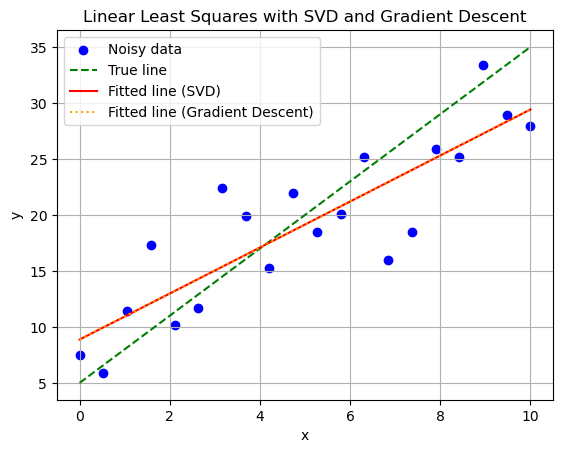

In [2]:

# 构造设计矩阵A和目标向量b
A = np.vstack([x, np.ones_like(x)]).T  # A的第一列是x，第二列是1，用于计算偏置
b = y

# 使用SVD分解求解最小二乘问题
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
Sigma_inv = np.diag(1 / Sigma)
A_pseudo_inverse = Vt.T @ Sigma_inv @ U.T  # Moore-Penrose伪逆
solution_svd = A_pseudo_inverse @ b
a_svd, b_svd = solution_svd

# 梯度下降求解最小二乘
def gradient_descent(A, b, lr=0.01, epochs=1000):
    m, n = A.shape
    theta = np.zeros(n)  # 初始化参数为0
    for epoch in range(epochs):
        gradient = -2 / m * A.T @ (b - A @ theta)  # 梯度计算
        theta -= lr * gradient  # 参数更新
    return theta

# 使用梯度下降求解
solution_gd = gradient_descent(A, b, lr=0.01, epochs=5000)
a_gd, b_gd = solution_gd

# 打印结果
print(f"SVD拟合的直线方程: y = {a_svd:.2f}x + {b_svd:.2f}")
print(f"梯度下降拟合的直线方程: y = {a_gd:.2f}x + {b_gd:.2f}")

# 绘制原始数据点和拟合直线
plt.scatter(x, y, label="Noisy data", color="blue")
plt.plot(x, y_true, label="True line", color="green", linestyle="--")
plt.plot(x, a_svd * x + b_svd, label="Fitted line (SVD)", color="red")
plt.plot(x, a_gd * x + b_gd, label="Fitted line (Gradient Descent)", color="orange", linestyle=":")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Least Squares with SVD and Gradient Descent")
plt.grid()
plt.show()


SVD拟合的正弦函数: y = 1.42 sin(x + 1.95)
梯度下降拟合的正弦函数: y = 1.42 sin(x + 1.95)


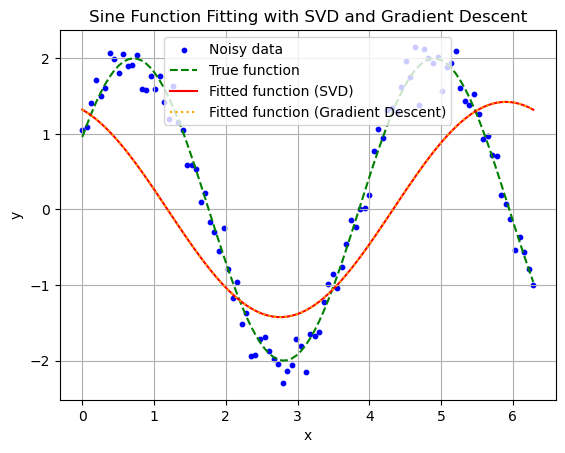

In [3]:
# 生成正弦数据
np.random.seed(42)
x = np.linspace(0, 2 * np.pi, 100)
y_true = 2 * np.sin(1.5 * x + 0.5)
y = y_true + np.random.normal(scale=0.2, size=x.shape)  # 加噪声

# 特征矩阵：sin(x), cos(x)
A = np.column_stack([np.sin(x), np.cos(x)])
b = y

# SVD求解
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
Sigma_inv = np.diag(1 / Sigma)
A_pseudo_inverse = Vt.T @ Sigma_inv @ U.T
solution_svd = A_pseudo_inverse @ b
a_sin_svd, b_cos_svd = solution_svd
amplitude_svd = np.sqrt(a_sin_svd**2 + b_cos_svd**2)  # 振幅
phase_svd = np.arctan2(b_cos_svd, a_sin_svd)  # 相位

# 梯度下降求解
def gradient_descent_sine(A, b, lr=0.01, epochs=1000):
    n_features = A.shape[1]
    theta = np.zeros(n_features)
    for epoch in range(epochs):
        gradient = -2 / A.shape[0] * A.T @ (b - A @ theta)
        theta -= lr * gradient
    return theta

solution_gd = gradient_descent_sine(A, b, lr=0.01, epochs=5000)
a_sin_gd, b_cos_gd = solution_gd
amplitude_gd = np.sqrt(a_sin_gd**2 + b_cos_gd**2)
phase_gd = np.arctan2(b_cos_gd, a_sin_gd)

# 打印结果
print(f"SVD拟合的正弦函数: y = {amplitude_svd:.2f} sin(x + {phase_svd:.2f})")
print(f"梯度下降拟合的正弦函数: y = {amplitude_gd:.2f} sin(x + {phase_gd:.2f})")

# 绘制对比图
plt.scatter(x, y, label="Noisy data", color="blue", s=10)
plt.plot(x, y_true, label="True function", color="green", linestyle="--")
plt.plot(x, amplitude_svd * np.sin(x + phase_svd), label="Fitted function (SVD)", color="red")
plt.plot(x, amplitude_gd * np.sin(x + phase_gd), label="Fitted function (Gradient Descent)", color="orange", linestyle=":")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine Function Fitting with SVD and Gradient Descent")
plt.grid()
plt.show()

拟合的圆: (x - 2.01)^2 + (y - 3.01)^2 = 5.00^2


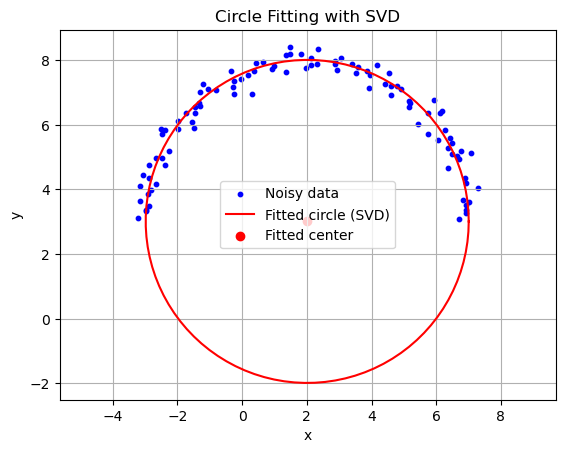

In [4]:
# 生成圆形数据
theta = np.linspace(0, 2 * np.pi*0.5, 100)
r = 5
h, k = 2, 3  # 圆心
x = h + r * np.cos(theta) + np.random.normal(scale=0.2, size=theta.shape)  # 加噪声
y = k + r * np.sin(theta) + np.random.normal(scale=0.2, size=theta.shape)

# 构造设计矩阵和目标向量
A = np.column_stack([x, y, np.ones_like(x)])
b = -(x**2 + y**2)

# 使用SVD求解
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
Sigma_inv = np.diag(1 / Sigma)
A_pseudo_inverse = Vt.T @ Sigma_inv @ U.T
solution = A_pseudo_inverse @ b

# 提取圆的参数
a, b, c = solution
h_fit = -a / 2
k_fit = -b / 2
r_fit = np.sqrt((a**2 + b**2) / 4 - c)

# 打印结果
print(f"拟合的圆: (x - {h_fit:.2f})^2 + (y - {k_fit:.2f})^2 = {r_fit:.2f}^2")

# 绘制结果
plt.scatter(x, y, label="Noisy data", color="blue", s=10)
theta_fit = np.linspace(0, 2 * np.pi, 100)
x_fit = h_fit + r_fit * np.cos(theta_fit)
y_fit = k_fit + r_fit * np.sin(theta_fit)
plt.plot(x_fit, y_fit, label="Fitted circle (SVD)", color="red")
plt.scatter([h_fit], [k_fit], color="red", label="Fitted center")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Circle Fitting with SVD")
plt.axis("equal")
plt.grid()
plt.show()


In [ ]:
def generalized_inverse(A):
    """
    求解矩阵 A 的广义减号逆矩阵及相关 P 和 Q
    """


In [12]:
# 求解矩阵A的Moore-Penrose广义逆
A=np.array([[1,0,-1,0],[0,2,2,2],[-1,4,5,3]])
A=np.mat(A)

# 求解A广义逆的P Q
A_pseudo_inverse = np.linalg.pinv(A)
A_pseudo_inverse
# G,P,Q=generalized_inverse(A)
# # 打印结果

# print("矩阵A的Moore-Penrose广义逆为：")
# print(A*A_pseudo_inverse*A)
# print(A)


matrix([[ 1.00000000e+00, -5.00000000e-01,  3.33333333e-01],
        [ 1.00000000e+00, -1.00000000e+00,  6.66666667e-01],
        [ 5.51980045e-17, -5.00000000e-01,  3.33333333e-01],
        [-1.00000000e+00,  2.00000000e+00, -1.00000000e+00]])